In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
sns.set()
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})


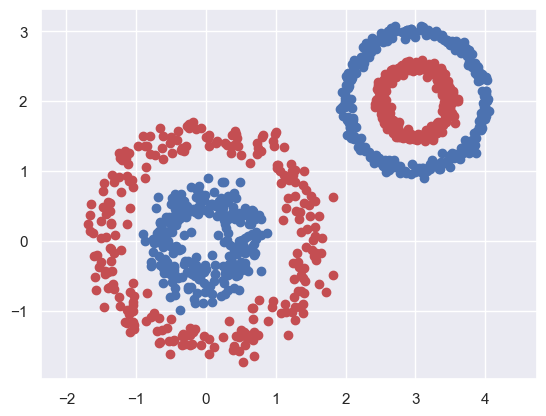

In [22]:
# Let's create a semi random non separate pair of sets
sample_size = 500

X,Y = make_circles(n_samples=sample_size,factor = 0.4,noise = 0.10)
Y = Y[:,np.newaxis]

X2,Y2 = make_circles(n_samples=sample_size,factor = 0.5,noise = 0.05)
Y2 = Y2[:,np.newaxis]

X = X*1.5
Y = 1 - Y
X2 = X2 + [3,2]

X = np.concatenate((X,X2))
Y = np.concatenate((Y,Y2))

plt.scatter(X[Y[:, 0] == 0,0],X[Y[:, 0] == 0,1], c='b')
plt.scatter(X[Y[:, 0] == 1,0],X[Y[:, 0] == 1,1], c='r')
plt.axis("equal")
plt.show()

In [24]:
%run "MLP.ipynb"
mlp_model = MultilayerPerceptron([2,4,4,1])
mlp_model.train(X,Y,10000)

# Predict the test input values purchase probability
Y_Pred = mlp_model.forward(X)

Training finished


Training finished


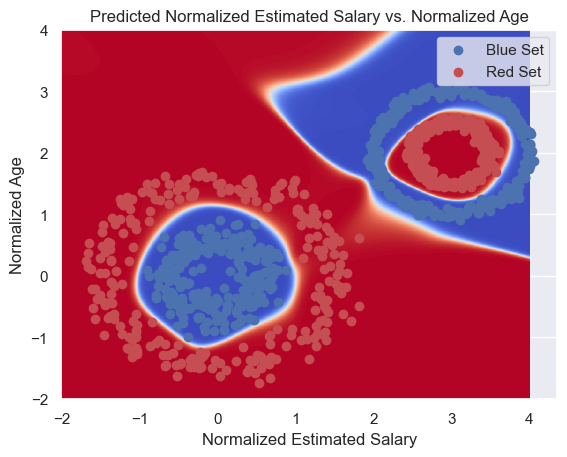

In [45]:
%run "MLP.ipynb"
mlp_model = MultilayerPerceptron([2,8,16,8,1])
mlp_model.train(X,Y,10000)

# Predict the test input values purchase probability
Y_Pred = mlp_model.forward(X)

#Plotting the whole predictive space vs The train data set
resolution = 1000
mx = np.linspace(-2,4,resolution)
my = np.linspace(-2,4,resolution)
xmesh, ymesh = np.meshgrid(mx,my)
plane_mesh = np.concatenate((xmesh.reshape(-1,1),ymesh.reshape(-1,1)),axis=1)
plane_predict = mlp_model.forward(plane_mesh).reshape(resolution,resolution)
plt.pcolormesh(mx, my, plane_predict,cmap='coolwarm',shading='nearest')
plt.scatter(X[Y[:, 0] == 0,0],X[Y[:, 0] == 0,1], c='b',label="Blue Set")
plt.scatter(X[Y[:, 0] == 1,0],X[Y[:, 0] == 1,1], c='r',label="Red Set")
plt.xlabel("Normalized Estimated Salary")
plt.ylabel("Normalized Age")
plt.title("Predicted Normalized Estimated Salary vs. Normalized Age")
plt.legend()
plt.show()